# How are in-demand skills trending for Data Analysts?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [3]:
df_DA = df[df['job_title'].str.contains('Data Analyst', case=False, na=False)].copy()
df_DA_exploded = df_DA.explode('job_skills')
df_DA_exploded['month_num'] = df_DA_exploded['job_posted_date'].dt.month
df_DA_exploded['month_name'] = df_DA_exploded['job_posted_date'].dt.strftime('%B')
top_5_skills = df_DA_exploded.groupby('job_skills').size() \
    .reset_index(name='total_count') \
    .sort_values(by='total_count', ascending=False) \
    .head(5)['job_skills'].tolist()
df_ready = df_DA_exploded.groupby(['month_num', 'month_name', 'job_skills']).size() \
    .reset_index(name='count') \
    .sort_values(by=['month_num', 'count'], ascending=[True, False]
                 )
df_ready = df_ready[df_ready['job_skills'].isin(top_5_skills)]
df_ready

,month_num,month_name,job_skills,count
164,1,January,sql,11272
49,1,January,excel,7690
129,1,January,python,6514
175,1,January,tableau,5800
123,1,January,power bi,4243
357,2,February,sql,8175
247,2,February,excel,5537
326,2,February,python,4842
367,2,February,tableau,4137
320,2,February,power bi,3257


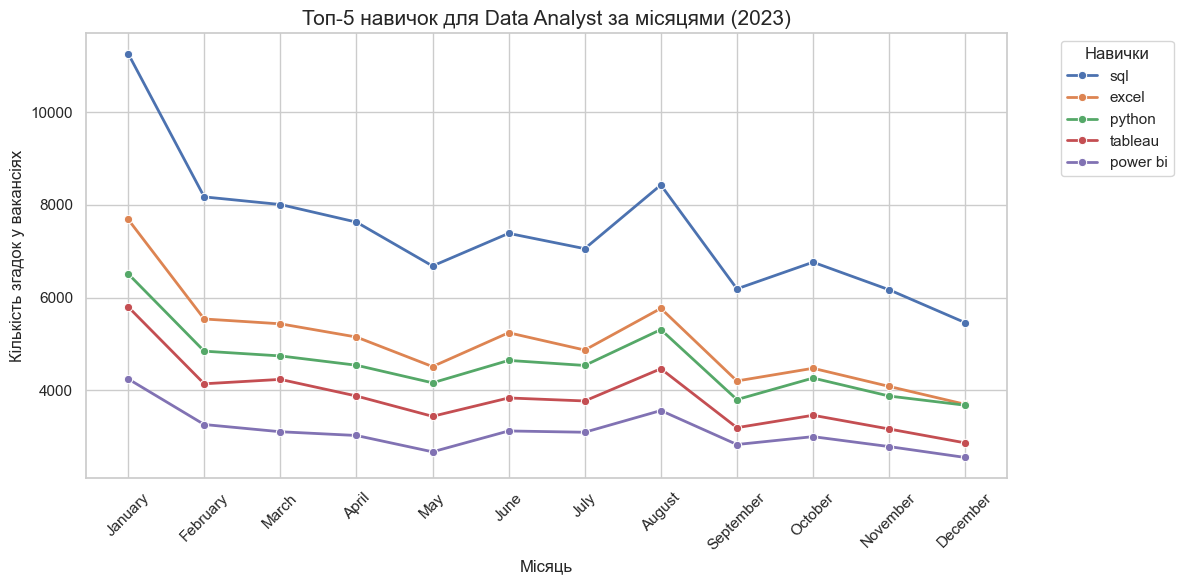

In [ ]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_ready, 
    x='month_name', 
    y='count', 
    hue='job_skills', 
    marker='o',      
    linewidth=2      
)
plt.title('Топ-5 навичок для Data Analyst за місяцями (2023)', fontsize=15)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість згадок у вакансіях', fontsize=12)
plt.legend(title='Навички', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()